# Prova 1:Exercicio 1

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Sistema: 
$y_{(k+2)} = a_1 \cdot y_k + a_2 \cdot y_{k-1} + b_1 \cdot u_{k+1} + 0.2 \cdot u_{k-1}$


In [95]:
# Parametros
a1 = 0.7
a2 = -0.18
b0 = 1

In [96]:
# Parâmetros de simulação
N = 50
dt = 0.1  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
# entrada rica
u = np.sin(np.pi * T) + np.sin(2 * np.pi * T) + np.sin(3 * np.pi * T) # entrada  
# entrada não rica
# u = np.ones((len(T)))

y = np.zeros((1, len(T)))[0] # saida
z = np.zeros((len(T)))
phi = np.zeros((3, len(T)))

len(T)

501

(SHAPES) y: (501,), z: (501,), phi: (3, 501), T: (501,)


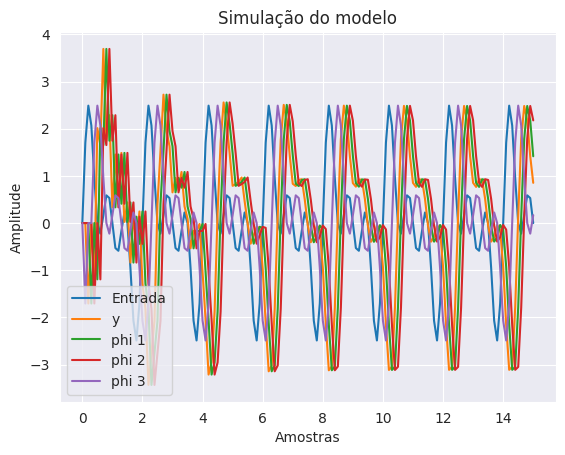

In [97]:
# Simulação dos modelos
for k in range(1, int(N/dt)):
    y[k+1] = a1*y[k-1] + a2*y[k-2] + b0*u[k-3]
    z[k] = y[k+1]
    phi[:, k] = [y[k-1], y[k-2], u[k-3]]

print(f'(SHAPES) y: {y.shape}, z: {z.shape}, phi: {phi.shape}, T: {T.shape}')

# Plotagem dos resultados juntos
corte = int(np.ceil(0.3*(len(T))))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], y[:corte], label='y')
plt.plot(T[:corte], phi[0, :corte], label='phi 1')
plt.plot(T[:corte], phi[1, :corte], label='phi 2')
plt.plot(T[:corte], phi[2, :corte], label='phi 3')

plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.title('Simulação do modelo')

plt.legend()
plt.show()

In [98]:
theta = np.zeros((3, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros

gama = np.eye(3)  # Matriz de ajuste

Modelo paramétrico:
$\left\{\begin{matrix} z = y_{[k+1])} \\\theta = [a_1, a_2, b_0] \\\phi = [y_{[k-1]}, y_{[k-2]}, u_{[k-3]}]\end{matrix}\right.$

In [99]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)): 
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]
    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k+1] = (z[k] - np.dot(theta[:, k].T, phi[:, k])) / ms
    delta_theta = (dt * np.dot(gama, np.dot(erro[k+1] , phi[:, k])) / ms)
    theta[:, k+1] = theta[:, k] + delta_theta

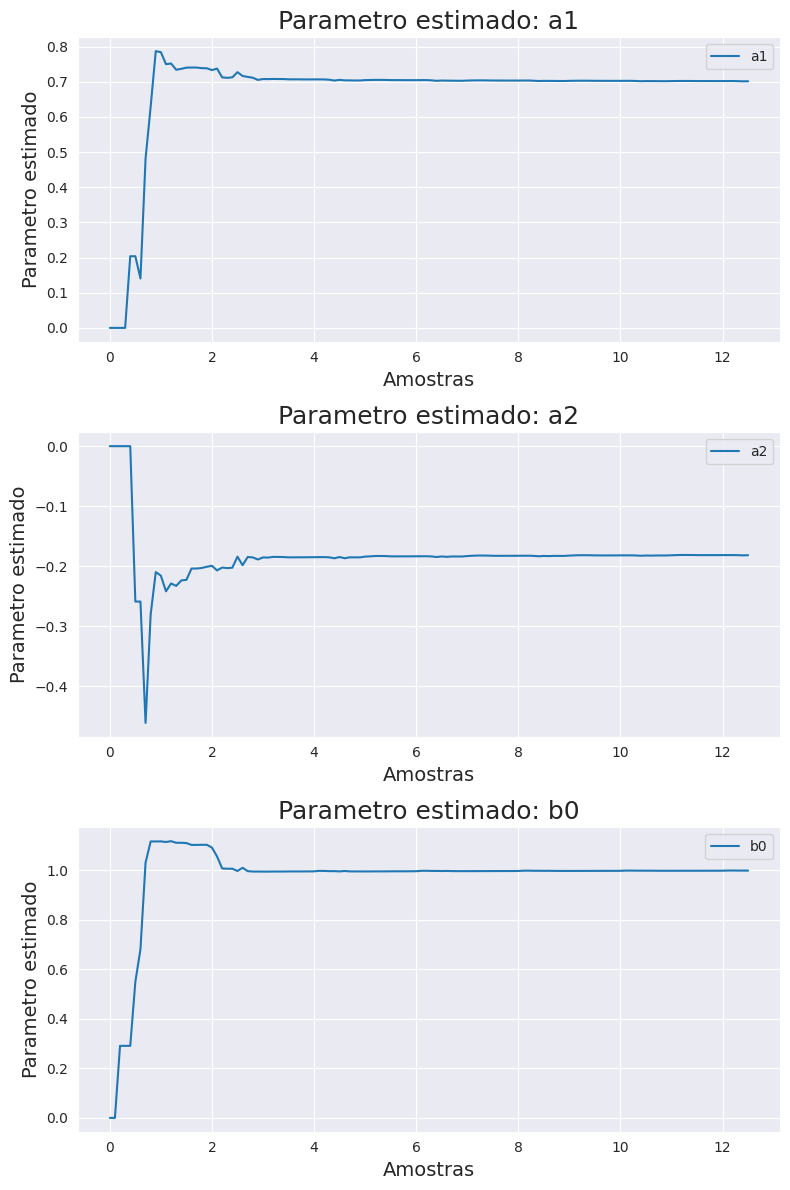

In [100]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

corte = int(np.ceil(0.25*len(theta[0])))

corr = {'a1': theta[0], 'a2': theta[1], 'b0': theta[2]}
fontesize = 14
titlesize = 18
# Primeiro subplot (Gráfico dos parâmetros estimados)
for i, (k,v) in enumerate(corr.items()):
    if i < 3: 
        xi = i 
        yi = 0
    else:
        xi = i - 3
        yi = 1
    axs[xi].plot(T[:corte], (v)[:corte], label=f'{str(k)}')
    axs[xi].legend()
    axs[xi].set_title(f'Parametro estimado: {str(k)}', fontsize=titlesize)
    axs[xi].set_xlabel('Amostras', fontsize=fontesize)
    axs[xi].set_ylabel('Parametro estimado', fontsize=fontesize)



# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()

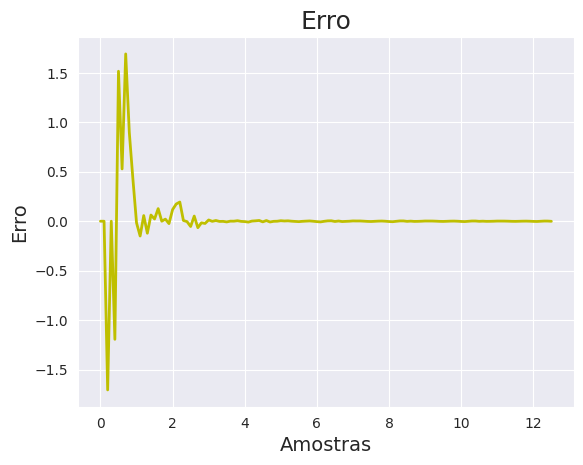

In [101]:
# Segundo subplot (Gráfico do erro)
plt.plot(T[:corte], erro[:corte], 'y', linewidth=2)
plt.xlabel('Amostras', fontsize=fontesize)
plt.ylabel('Erro', fontsize=fontesize)
plt.title('Erro', fontsize=titlesize)
plt.grid(True)

# Exiba o gráfico
plt.show()  